# Introduction to Fatou Package

In [105]:
using Fatou

In this notebook, we demonstrate some of the features of the Fatou package. This is a package for exploring and visualizing various kinds of complex dynamical sets, such as Julia and Fatou sets, Mandelbrot sets, and more.

Version of Julia: 0.6.2

Packages used: Fatou. To install, simply run: "`Pkg.add("Fatou")`". This will also automatically install any packages that Fatou depends on.

## Example I: Filled Julia Set

Below, we display the filled Julia set of a particular quadratic polynomial in the complex plane. The filled Julia set is the set of points for which the polynomial repeatedly applied to those points does not diverge to infinity. Formally, the filled Julia set of a polynomial $f$ is defined as the *complement* of the set of all $z \in \mathbb{C}$ such that $\lim\limits_{k \to \infty} f^k(z) = \infty$.

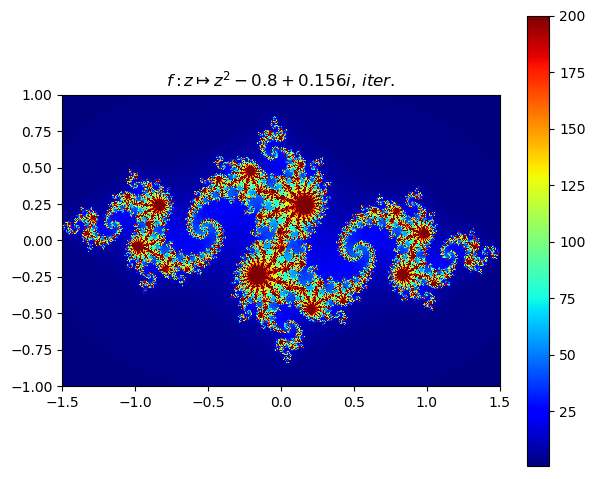

7.056116 seconds (146.82 M allocations: 3.824 GiB, 10.21% gc time)


PyObject <matplotlib.colorbar.Colorbar object at 0x135b7f450>

In [106]:
c = -0.8+0.156im # Play around with these numbers!
poly_str = "z^2+$c" # The polynomial is z^2 + $c [$c is substituted with the value of c]
plot_bounds = [-1.5,1.5,-1,1] # real axis from -1.5 to 1.5; complex axis from -1.0i to 1.0i
#= N is the max number of iterations; n is the number of grid points in the horizontal direction.
(The number of grid points in the vertical direction is determined so as to ensure the mesh sizes in
the horizontal and vertical directions are as close as possible.) Any standard colormap from Colors.jl may be used.
iter=true means that points are colored based on the number of iterations taken to diverge above the specified
value of ϵ in magnitude (or colored corresponding to N, if the iteration does not diverge within N iterations;
these points [colored dark red below] are approximately the points that are actually in the filled Julia set).
=#
jf = juliafill(poly_str,ϵ=4,∂=plot_bounds,N=200,n=1251,cmap="jet",iter=true)
plot(fatou(jf), bare=false) # bare=false (default): Show the colorbar. Set bare=true to hide it and the plot title.

## Example II: Newton's Method Iteration

Below, we apply the Newton-Raphson root-finding method with step size $m=\frac{1}{2}$ to the polynomial $f(x) = z^5-1$, and color each point based on the identity of the root that the iteration converges to, starting from said point. The boundary between the regions converging to the different roots is known as the *Newton fractal*. 

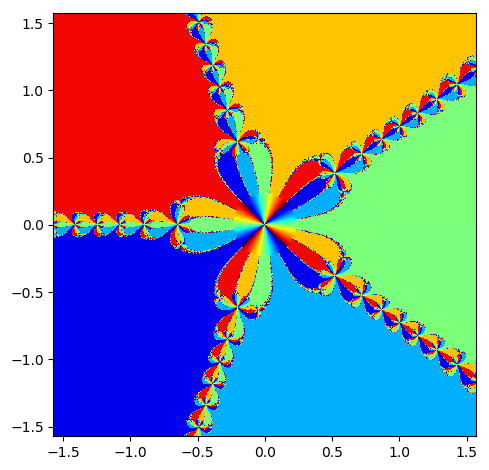

4.941953 seconds (75.14 M allocations: 1.958 GiB, 8.53% gc time)


In [107]:
#= In this case, ϵ is the tolerance parameter below which we declare convergence to a root.
   By default, the plot bounds are [-1.5,1.5,-1.5,1.5].
=#
nw = newton("z^5-1",ϵ=0.001,n=1000,m=0.5,cmap="jet")
plot(fatou(nw),bare=true)